In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math
import warnings
from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
#Import the Data 
#make the DataFrame
train = pd.read_excel('CRIME.xls', sheet_name='Sheet 1')

In [4]:
def cleaner(df):
    df.drop(df.index[:3], inplace=True)
    
    #grab the first row for the header
    new_header = df.iloc[0] 

    #take the data less the header row
    df = df[1:] 
    
    #drop useless rows at bottom
    df = df[:-3]
    
    #set the header row as the df header
    df.columns = new_header
    
    #set new index
    df.index = list(range(0, len(df)))
    
    #rename columns
    df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter' : 'Murder', 
                     'Property\ncrime': 'Property Crime', 
                     'Larceny-\ntheft': 'Larceny Theft',
                     'Aggravated\nassault': 'Aggravated Assault',
                     'Rape\n(legacy\ndefinition)2': 'Rape (Legacy)',
                     'Motor\nvehicle\ntheft': 'Motor Vehicle Theft',
                     'Violent\ncrime': 'Violent Crime'}, 
                  inplace = True)
    
    #drop rape columns
    df.drop('Rape\n(revised\ndefinition)1', axis = 1, inplace = True)
    
    df.drop('Rape (Legacy)', axis = 1, inplace = True)
    return df

train = cleaner(train)
train.head()

3,City,Population,Violent Crime,Murder,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson3
0,Adams Village,1861,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,4,16,223,53,165,5,NaN


In [5]:
#remove outliers
train = train[train.loc[:, 'Population'] < 200000]

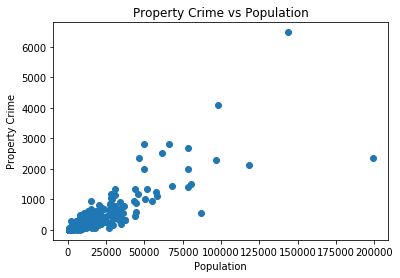

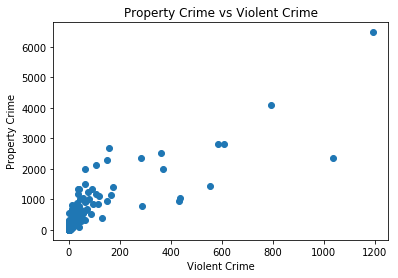

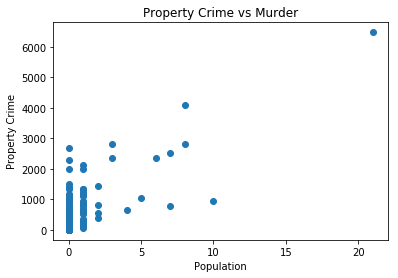

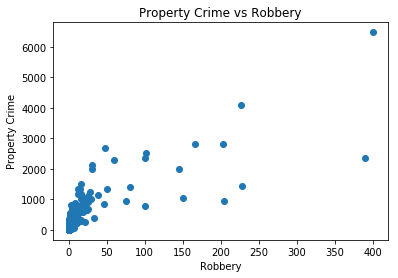

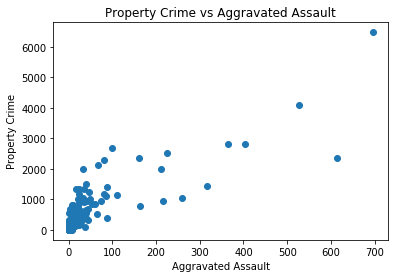

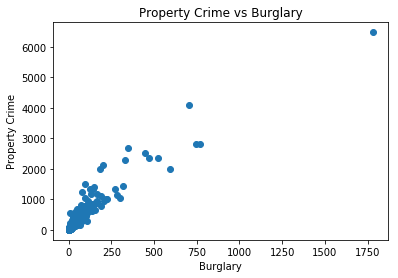

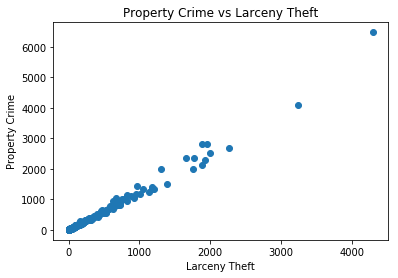

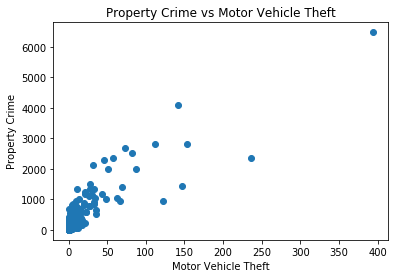

In [6]:
# Set up the matplotlib figures

plt.scatter(train['Population'], train['Property Crime'])
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Population')
plt.show()

plt.scatter(train['Violent Crime'], train['Property Crime'])
plt.xlabel('Violent Crime')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Violent Crime')
plt.show()

plt.scatter(train['Murder'], train['Property Crime'])
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Murder')
plt.show()

plt.scatter(train['Robbery'], train['Property Crime'])
plt.xlabel('Robbery')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Robbery')
plt.show()

plt.scatter(train['Aggravated Assault'], train['Property Crime'])
plt.xlabel('Aggravated Assault')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Aggravated Assault')
plt.show()

plt.scatter(train['Burglary'], train['Property Crime'])
plt.xlabel('Burglary')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Burglary')
plt.show()

plt.scatter(train['Larceny Theft'], train['Property Crime'])
plt.xlabel('Larceny Theft')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Larceny Theft')
plt.show()

plt.scatter(train['Motor Vehicle Theft'], train['Property Crime'])
plt.xlabel('Motor Vehicle Theft')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Motor Vehicle Theft')
plt.show()

In [7]:
#make a relevant features DataFrame
features = pd.DataFrame()

#Add Relevant Features
features['Pop'] = train['Population']
features['Pop^2'] = train['Population'] * train['Population']
features['Murder'] = train['Murder'].where(train['Murder'] == 0, 1)
features['Robbery'] = train['Robbery'].where(train['Robbery'] == 0, 1)
features['Larceny Theft'] = train['Larceny Theft']

In [9]:
#Define Variables for Model
#Start w/ Features
X = features
#Then Outcome
y = train.loc[:, 'Property Crime']

In [10]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [-3.48746015e-03  2.14564609e-08  4.51360516e+01 -9.63860435e+00
  1.35681486e+00]

Intercept: 
 9.94905693074611

R-squared:
0.9869023302721799


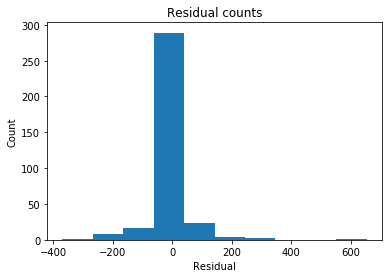

In [12]:
# Extract predicted values for original model.
predicted = regr.predict(X).ravel()
actual = y.values

# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.reshape(-1,1)

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

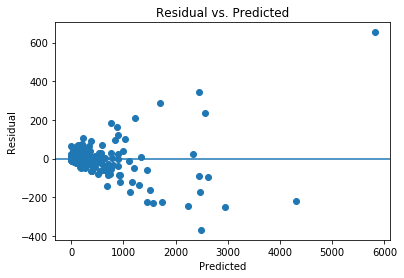

In [14]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()